# Unsupervised Learning

In [12]:
#Importing libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
import nbimporter
from supervised_learning import X_final,y_final

## Apply K-Means Clustering (elbow method to determine K)

C:\Users\2027\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\2027\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\2027\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\2027\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

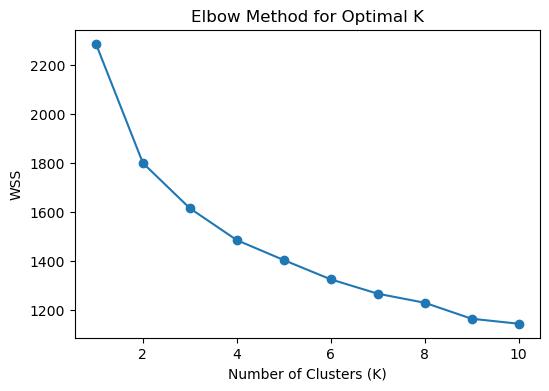

In [14]:
X_clust = X_final  

WSS = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_clust)
    WSS.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, WSS, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WSS")
plt.title("Elbow Method for Optimal K")
plt.show()

## Hierarchical Clustering

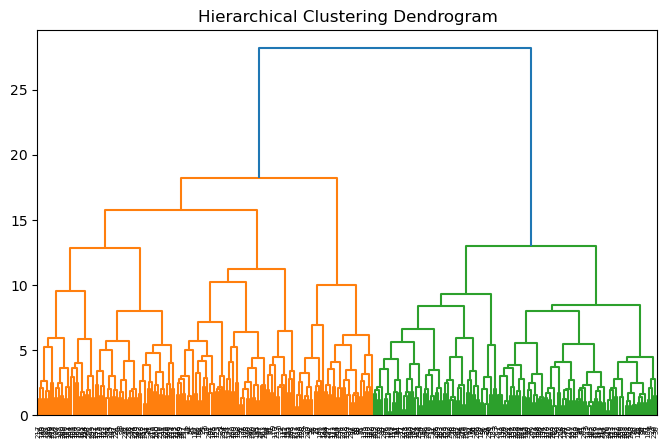

In [8]:
linked = linkage(X_clust, method="ward")

plt.figure(figsize=(8, 5))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


## Compare clusters with actual disease labels

C:\Users\2027\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means Adjusted Rand Index: 0.27663389970043145
K-Means Silhouette Score: 0.2000946537794421
Hierarchical Adjusted Rand Index: 0.1587896807225092
Hierarchical Silhouette Score: 0.1518412626953802


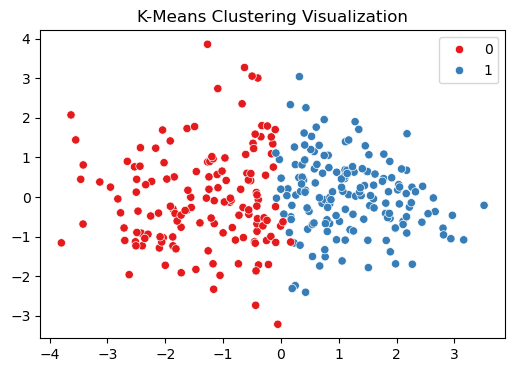

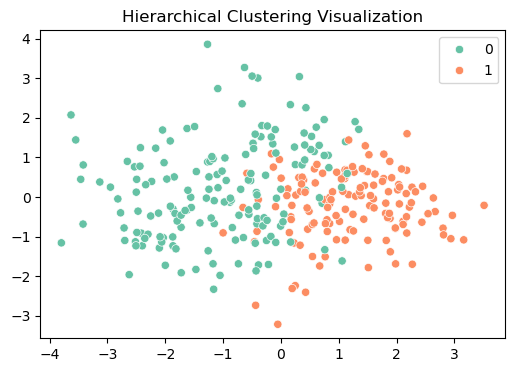

In [15]:

# ---- KMeans with chosen K ----
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_clust)

print("K-Means Adjusted Rand Index:", adjusted_rand_score(y_final, y_kmeans))
print("K-Means Silhouette Score:", silhouette_score(X_clust, y_kmeans))

# ---- Hierarchical Clustering ----
hier_clust = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_hier = hier_clust.fit_predict(X_clust)

print("Hierarchical Adjusted Rand Index:", adjusted_rand_score(y_final, y_hier))
print("Hierarchical Silhouette Score:", silhouette_score(X_clust, y_hier))

# ---- Visualization --------
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_clust)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_kmeans, palette="Set1")
plt.title("K-Means Clustering Visualization")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_hier, palette="Set2")
plt.title("Hierarchical Clustering Visualization")
plt.show()
